## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("/courses/EDS232/Data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [2]:
# init features
features = eeip_data[["utility_pv_technical_generation_potential_mwh", 
                         "residential_pv_technical_generation_potential_mwh", 
                         "land_based_wind_technical_generation_potential_mwh", 
                         "commercial_pv_technical_generation_potential_mwh"]]

# remove NAs from features
features_clean = features.dropna()

# scale features
features_scaled = pd.DataFrame(StandardScaler().fit_transform(features_clean), columns = features.columns)

# print shape
print(f"Shape of cleaned and scaled EEIP dataframe: {features_scaled.shape}")

Shape of cleaned and scaled EEIP dataframe: (3107, 4)


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


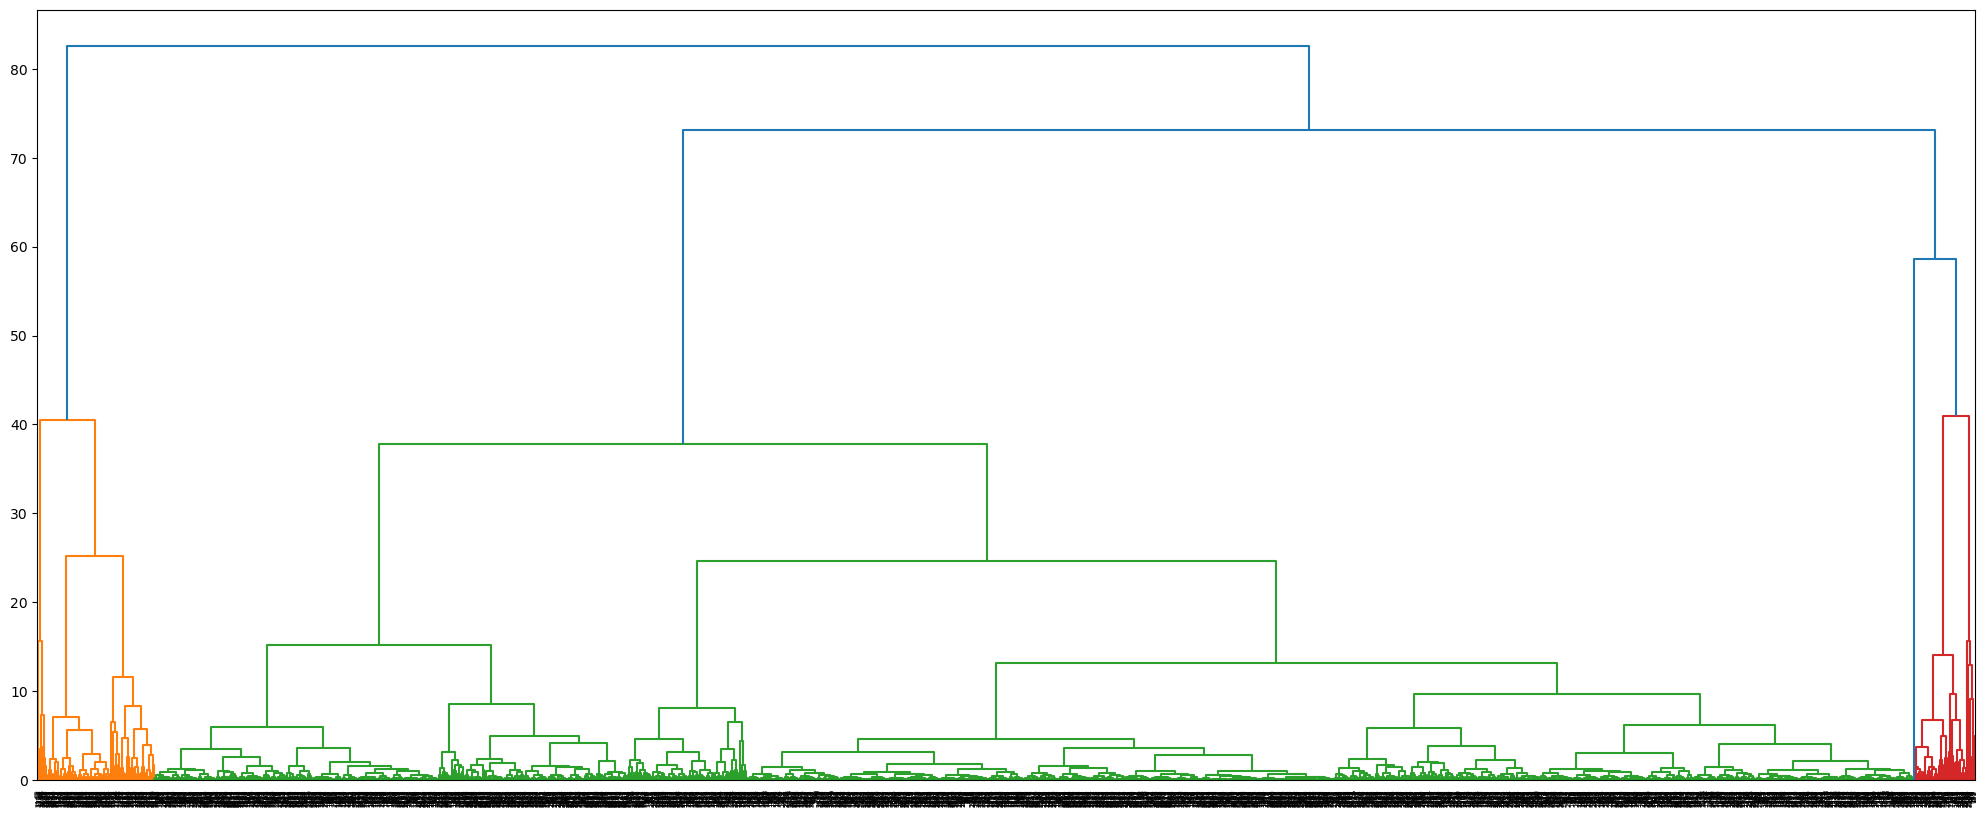

In [3]:
# perform clustering with balanced groups
lk = linkage(features_scaled, method = 'ward')

# set figsize
fig = plt.figure(figsize=(25, 10))

# create and view dendrogram
dendro = dendrogram(lk)
dendro;

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [4]:
# set optimal clusters
num_clusters = 4

# extract cluster assignments
clust = fcluster(lk, num_clusters, criterion = "maxclust")

# insert cluster assignment column in feature df
features_clust = features_scaled.assign(Cluster = clust)

# calculate means of features by cluster
energy_mean = features_clust.groupby('Cluster').mean()

energy_mean

,utility_pv_technical_generation_potential_mwh,residential_pv_technical_generation_potential_mwh,land_based_wind_technical_generation_potential_mwh,commercial_pv_technical_generation_potential_mwh
Cluster,,,,
1,2.831068,-0.193351,3.004580,-0.197860
2,-0.184742,-0.121549,-0.185776,-0.104943
3,-0.076363,3.631745,-0.382148,3.046819
4,-0.661236,26.888227,-0.527199,37.606587


### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

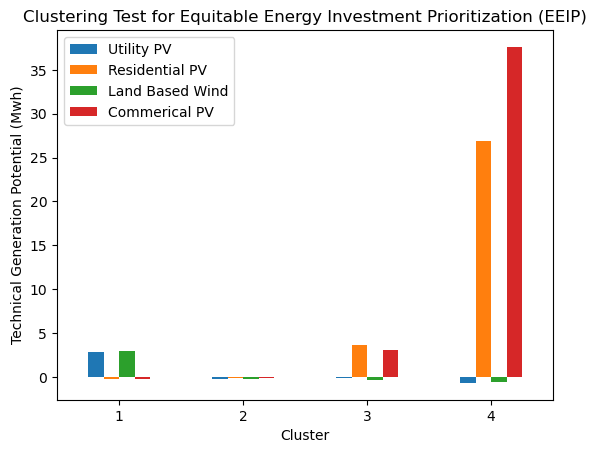

In [5]:
energy_mean.plot.bar(ylabel = "Technical Generation Potential (Mwh)", 
                     title = 'Clustering Test for Equitable Energy Investment Prioritization (EEIP)', 
                     rot = 0.5) # fix cluster labels right side up

plt.legend(['Utility PV', 'Residential PV', 'Land Based Wind', 'Commerical PV'])

### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

The reason cluster 4 looks the way that it does is because there were a lot of values in residential and commerical that were really close to each other but also far away from utility and land based wind. In contrast, for clusters 1 and 3, there was some distance between those variables but only a fraction of the amount, and barely any at all for cluster 2.

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

In [6]:
pd.set_option('display.max_columns', None)

# filter for chose ej features
ej_features = eeip_data.filter(regex = "pm25_indicator|ozone_indicator|cancer_indicator")

# scale and make dict to feed into `assign`
ej_features_dict = dict(pd.DataFrame(StandardScaler().fit_transform(ej_features), columns = ej_features.columns))

# add ej variables to energy features df
features_update_ej = (
    features_scaled
    .assign(
        **ej_features_dict
    )
)

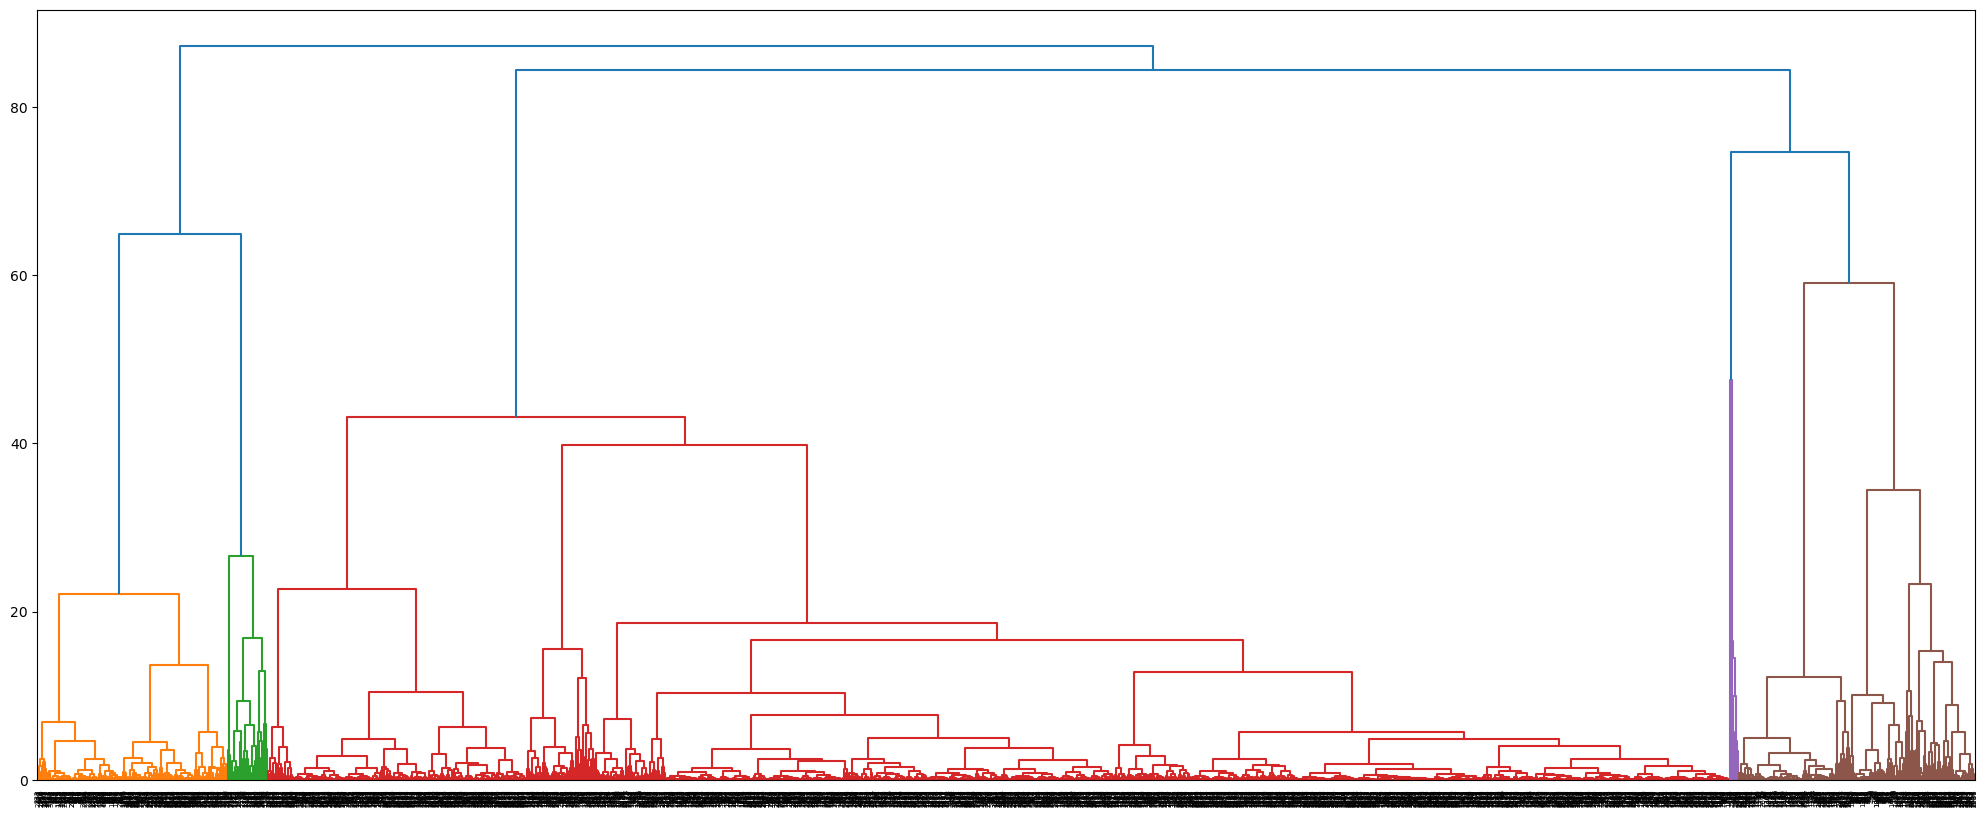

In [7]:
# perform clustering with balanced groups
lk_ej = linkage(features_update_ej, method = 'ward')

# set figsize
fig = plt.figure(figsize=(25, 10))

# create and view dendrogram
dendro_ej = dendrogram(lk_ej)
dendro_ej;

In [10]:
# set optimal clusters
num_clusters_ej = 6

# extract cluster assignments
clust_ej = fcluster(lk, num_clusters_ej, criterion = "maxclust")

# insert cluster assignment column in feature df
features_clust_ej = features_update_ej.assign(Cluster = clust_ej)

# calculate means of features by cluster
energy_mean_ej = features_clust_ej.groupby('Cluster').mean().rename(
    columns = {energy_mean.columns[0]: 'utility_mwh', 
               energy_mean.columns[1]: 'residential_mwh', 
               energy_mean.columns[2]: 'wind_mwh', 
               energy_mean.columns[3]: 'commerical_mwh'}) # rename columns to shorten length of pandas table

energy_mean_ej

,utility_mwh,residential_mwh,wind_mwh,commerical_mwh,pm25_indicator,ozone_indicator,cancer_indicator
Cluster,,,,,,,
1,7.808512,-0.115732,8.053812,-0.138976,-0.216563,1.772569,-0.350899
2,2.396989,-0.200120,2.564240,-0.202995,-0.237012,1.099960,-0.311165
3,-0.184742,-0.121549,-0.185776,-0.104943,-0.024306,-0.090472,0.013768
4,-0.159626,2.704174,-0.407052,2.361321,1.074648,0.316111,0.162575
5,0.461644,9.625287,-0.221227,7.476193,1.423689,0.687377,0.355142
6,-0.661236,26.888227,-0.527199,37.606587,4.091266,1.475287,2.007065


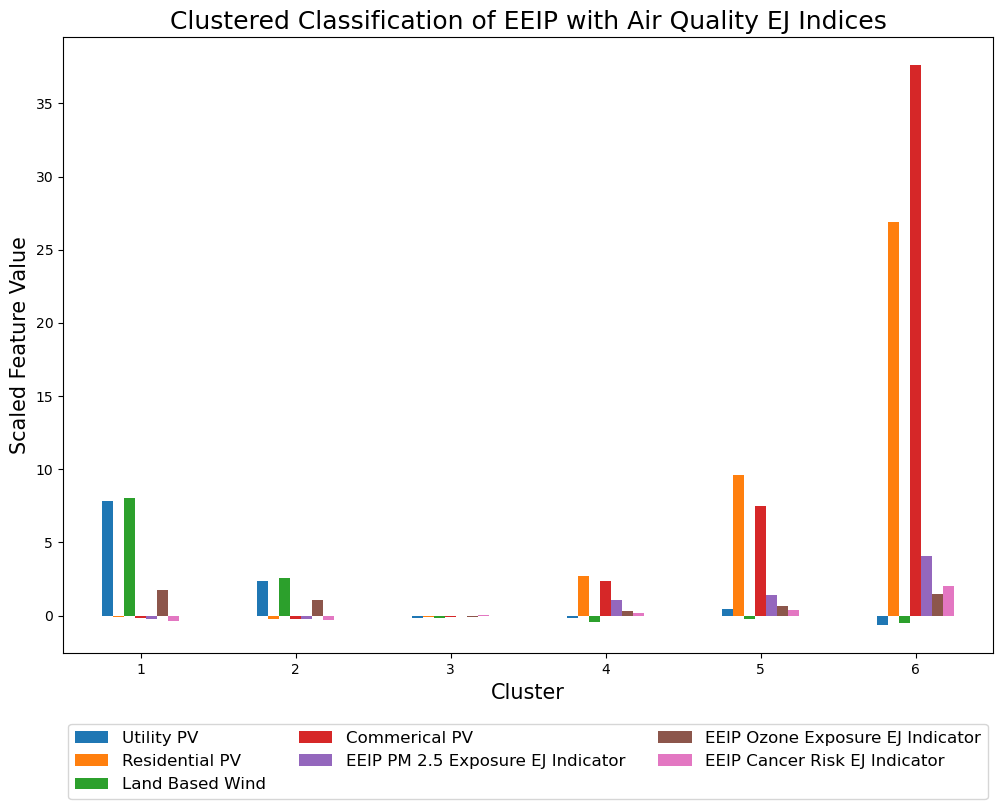

In [12]:
with plt.rc_context({'axes.labelsize': 15, 
                     'axes.titlesize': 18}):

    fig, ax = plt.subplots(figsize = [12,8])

    energy_mean_ej.plot.bar(ylabel = "Scaled Feature Value", 
                            title = "Clustered Classification of EEIP with Air Quality EJ Indices", 
                            ax = ax, 
                            rot = 0.5) # fix cluster labels right side up

    plt.legend(['Utility PV', 'Residential PV', 'Land Based Wind', 'Commerical PV', 'EEIP PM 2.5 Exposure EJ Indicator', 'EEIP Ozone Exposure EJ Indicator', 'EEIP Cancer Risk EJ Indicator'], 
               ncols = 3, 
               loc = 'lower center', 
               bbox_to_anchor = (0.5, -0.25, 0, 0),
               fontsize = 12)

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis

I added exposure to particulate matter & ozone, and cancer risk. I chose these guessing that they would be associated with energy generation, given the aerosols emmitted from fossil fuel burning, and the cancer risk therein. My question therefore was how renewable energy is associated with common energy production pollutants in the areas where it's present, and how that affects cancer rates on socioeconomic lines.

It seems that in areas where wind turbines are abundant, and the solar energy generation of utilities overshadows that of commercial and residential generation, there is the most inequality in terms of ozone exposure. In cluster 3 where the opposite is true in terms of energy generation, there is some inequality of all three added ej variables, being cancer risk, and ozone & aerosol exposure. I'm wondering if this is a result of population density. If this is the case, then it would have policy implications as cities and more rural areas would have to approach renewable energy differently as different risks are incurred.